In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09_impute.csv'


In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,alim17_3,⋯,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa
0,2,2,2,2,2,2,7,1,3,⋯,1,2,2,2,2,2,2100,700,2,1
0,2,2,2,2,2,2,7,3,3,⋯,1,2,1,2,2,2,900,20,2,1
0,2,2,2,2,2,2,4,2,7,⋯,1,2,2,2,2,2,1700,350,2,1
0,2,2,2,2,2,2,3,1,4,⋯,2,1,2,2,2,2,1200,300,2,9
0,2,2,2,2,2,2,7,7,7,⋯,1,2,1,2,2,2,3100,300,2,2
0,2,2,2,2,2,2,7,1,7,⋯,2,2,2,2,2,1,3300,2400,2,1


In [4]:
ncol(data)

[1] 75

In [5]:
list_bin = c('diconsa',
 'num_trab_d',
 'num_auto',
 'num_van',
 'num_moto',
 'num_bici',
 'num_ester',
 'num_grab',
 'num_radio',
 'num_tva',
 'num_tvd',
 'num_dvd',
 'num_video',
 'num_licua',
 'num_tosta',
 'num_micro',
 'num_refri',
 'num_estuf',
 'num_lavad',
 'num_planc',
 'num_maqui',
 'num_venti',
 'num_aspir',
 'num_compu',
 'num_impre',
 'num_juego',
 'alim17_1',
 'alim17_2',
 'alim17_3',
 'alim17_4',
 'alim17_5',
 'alim17_6',
 'alim17_7',
 'alim17_8',
 'alim17_9',
 'alim17_10',
 'alim17_11',
 'alim17_12',
 'acc_alim18')

In [6]:
list_cat = c('diconsa', 'num_trab_d', 'num_auto', 'num_van', 'num_moto',
 'num_bici', 'num_ester', 'num_grab', 'num_radio', 'num_tva', 'num_tvd', 'num_dvd', 'num_video', 'num_licua',
 'num_tosta', 'num_micro', 'num_refri', 'num_estuf', 'num_lavad', 'num_planc', 'num_maqui', 'num_venti', 'num_aspir', 'num_compu', 'num_impre', 'num_juego')


In [7]:
list_num = c('anio_tvd',
 'anio_licua',
 'anio_refri',
 'anio_estuf',
 'anio_lavad',
 'anio_planc',
 'tsalud1_h',
 'tsalud1_m',
 'est_alim',
 'est_trans')

In [8]:
length(list_num) + length(list_cat) + length(list_bin)

[1] 75

In [9]:
dist_data <- kmed::distmix(data = data,
                           method = "gower", 
                           idnum = list_num, 
                           idbin = list_bin, 
                           idcat = list_cat)  

In [10]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- kmed::fastkmed(distdata = dist_data, ncluster = k, iterate = 50)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = dist_data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [11]:
max(dunn_kmeans)

[1] 0.056477

Saving 7 x 7 in image


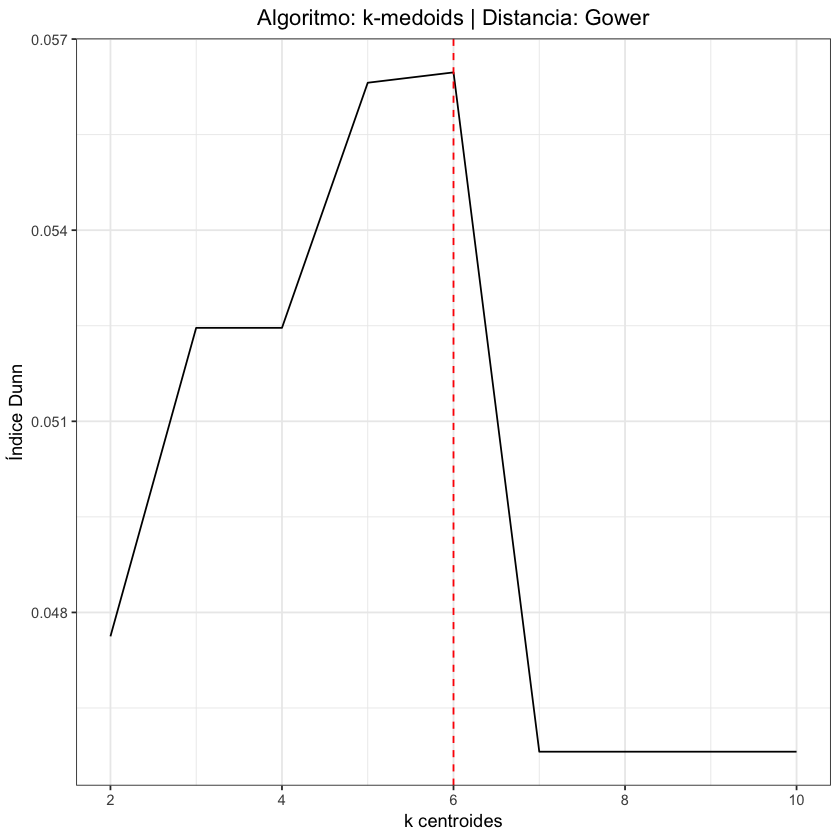

In [12]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-medoids | Distancia: Gower', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/dunn_gower_og.png", dpi = 300)
    

In [13]:
kmeans <- kmeans <- kmed::fastkmed(distdata = dist_data, 
                                   ncluster = range_k[which.max(dunn_kmeans)], 
                                   iterate = 50)

Saving 7 x 7 in image


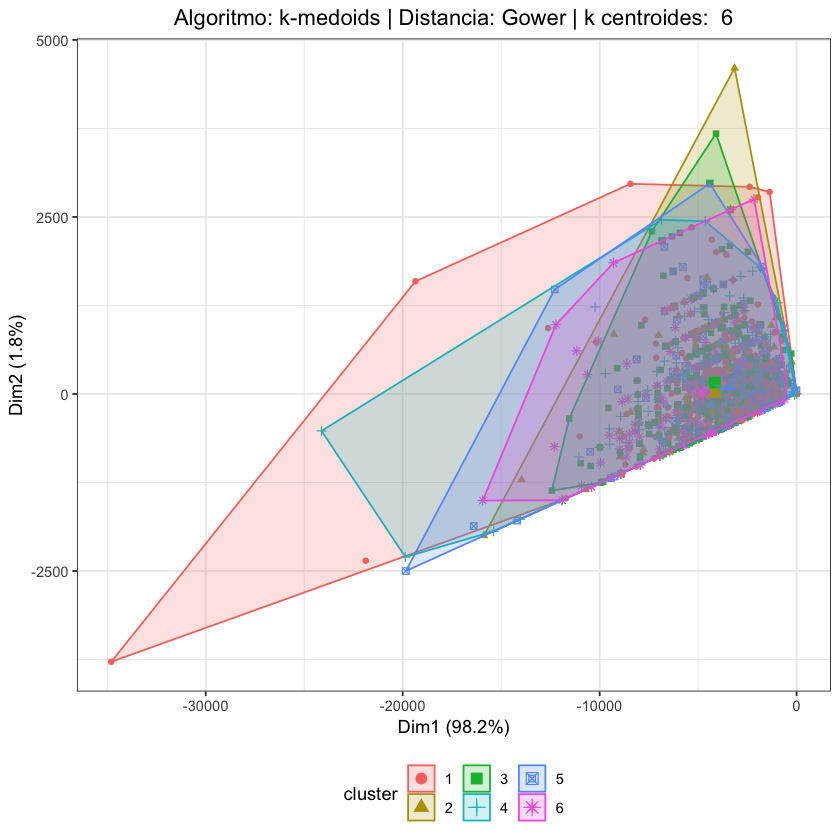

In [14]:
plot_kmeans <- factoextra::fviz_cluster(object = list(data = data, 
                                                      cluster = kmeans$cluster),
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-medoids | Distancia: Gower | k centroides: ', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)  


plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/kmedoids_gower_og.png", 
       dpi = 300)

In [16]:
dunn_kmeans

[[1]]
[1] 0.04762449 0.05246692 0.05246692 0.05631443 0.05647700 0.04581409 0.04581409
[8] 0.04581409 0.04581409

In [19]:
file = '../../../../../../dataframes/enigh/HOGARES/df_og_dunn.csv'


In [20]:
write.csv(dunn_kmeans, 
          file = file,
          row.names=T)
